In [155]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
# 加载数据
data = open(r"F:\0_个人学习\3_数据分析与挖掘\4_机器学习\1_逻辑回归\logistic.txt").readlines()
x = []
y = []
for i in data:
    x_da = i.strip().split('\t')
    x.append([float(x_da[0]),float(x_da[1])])
    y.append(int(x_da[2]))
# 其中x,y分别为特征及分类标签值

# 数据是否需要标准化
scale = False

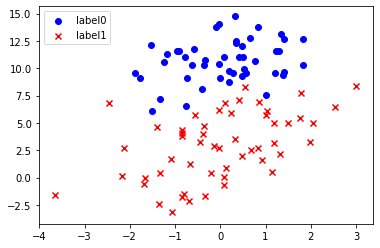

In [156]:
# 绘制特征散点分布图
def plot_data(x):
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    for i in range(len(x)):
        if int(y[i]) == 0:
            x0.append(x[i][0])
            y0.append(x[i][1])
        else:
            x1.append(x[i][0])
            y1.append(x[i][1])
        # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot_data(x)
plt.show()

In [157]:
# 给样本添加偏置项（即添加常数项）
x_data = np.concatenate((np.ones((100,1)),x),axis=1)
print(x_data.shape)
y_data = np.array(y).reshape(-1,1)

(100, 3)


In [158]:
# 梯度下降法计算

# sigmoid函数
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

# 代价函数
def cost(xMat,yMat,ws):
    left = np.multiply(yMat, np.log(sigmoid_function(xMat*ws)))
    right = np.multiply(1-yMat, np.log(1-sigmoid_function(xMat*ws)))
    return np.sum(left+right)/(-len(xMat))

# 梯度下降算法
def grandAscent(xArr,yArr):
    # 数据标准化
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    lr = 0.001
    epochs = 10000
    costList = []
    # 计算数据行列数
    # 行代表数据个数，列代表权值个数
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    for i in range(epochs+1):
        # 计算h_theta_x的值
        h = sigmoid_function(xMat*ws)
        # 计算误差值
        ws_grad = xMat.T*(h - yMat)/m
        # 权值参数迭代
        ws = ws - lr*ws_grad 
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [159]:
# 训练模型，得到权值和cost值的变化
ws,costList = grandAscent(x_data, y_data)
print(ws)

[[ 2.05836354]
 [ 0.3510579 ]
 [-0.36341304]]


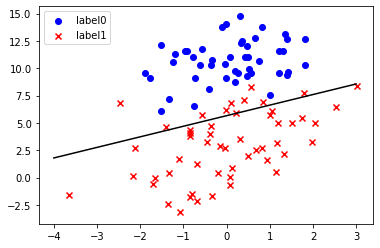

In [160]:
if scale == False:
    # 画图决策边界
    plot_data(x)
    x_test = [[-4],[3]]
    y_test = (-ws[0] - x_test*ws[1])/ws[2]
    plt.plot(x_test, y_test, 'k')
    plt.show()

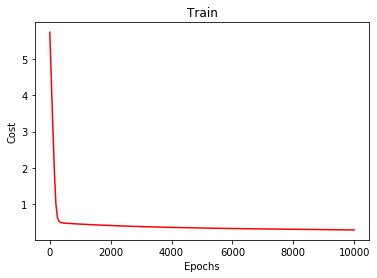

In [161]:
# 画图 loss值的变化
x = np.linspace(0,10000,201)
plt.plot(x, costList, c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [162]:
# 预测
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid_function(xMat*ws)]

predictions = predict(x_data, ws)

print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        47
           1       1.00      0.81      0.90        53

    accuracy                           0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100

